In [ ]:

# Importações padrões
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importações de classe Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.optimizers import SGD
from keras.utils import to_categorical

# Importando os dados
from keras.datasets import fashion_mnist, mnist

# Importando ferramentas
from sklearn.model_selection import KFold

from tensorflow.image import resize
import tensorflow as tf


In [15]:
tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

A VGG16 inicialmente foi treinada para imagens coloridas. Portanto, é necessário que ela receba imagens com canais de cor. Ou seja, cada pixel da imagem será representado por mais de um valor. Tipicamente, utilizamos o sistema de cor RGB, ou seja, cada pixel da imagem é composto por três valores. Podemos dizer, portanto, que uma imagem de 32 pixels de largura e 32 pixels de altura no sistema RGB tem uma dimensionalidade de 32x32x3.

Como as imagens do Fashion MNIST são em tons de cinza (ou seja, só possuem um canal de cor e, portanto, cada imagem tem o tamanho 28x28x1), é necessário redimensionar as imagens do dataset para 32x32x3, adicionando outros dois canais para usar o VGG16. 



In [3]:
# Importando o modelo já pronto VGG16

#modelo_vgg16 = VGG16(input_shape = (32,32,3))

In [4]:
# Verificando a construção do modelo
#modelo_vgg16.summary()

# Vamos agora tratar os códigos para usar no novo modelo.

Com os dados já limpos vamos realizar o desenvolvimento de um modelo base: 
1. Carregando os dados
2. Preparação dos dados
3. Definindo o modelo
4. Medindo o modelo
5. Apresentação de resultados

In [16]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

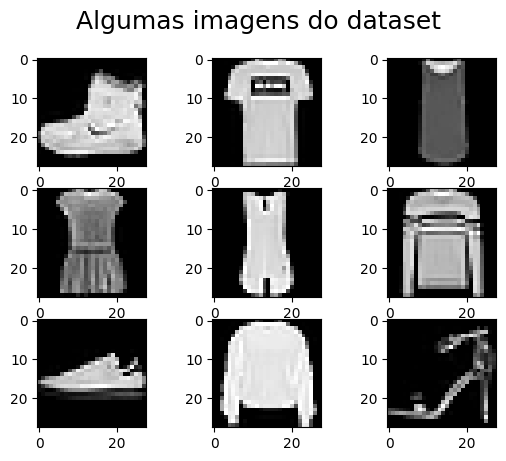

In [17]:

# #Vendo as imagens
plt.suptitle("Algumas imagens do dataset", fontsize = 18)
c = 1
for i in range(9):
 plt.subplot(3, 3, c)
 plt.imshow(X_train[i], cmap='gray')
 c = c + 1
plt.show()

In [18]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [19]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [20]:
def carregamento_dados():
# carregando os dados

    (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Transformar dados X em array e float
    X_train = X_train.reshape(X_train.shape[0],784 ).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')

# Normaliza os dados em X
    X_train = X_train / 255
    X_test = X_test / 255

# Transformar dados y em array
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    return X_train, y_train, X_test, y_test



In [21]:
X_train, y_train, X_test, y_test = carregamento_dados()

In [22]:
X_train.shape

(60000, 784)

In [23]:
def modelo_feito():

    # Construindo o modelo
    modelo = Sequential()
    modelo.add(Dense(784, input_shape = (784,), activation = 'relu'))
    modelo.add(Dense(1024, activation = 'relu'))
    modelo.add(Dense(2048, activation = 'relu'))
    modelo.add(Dense(2048, activation = 'relu'))
    modelo.add(Dense(10, activation = 'softmax'))

    #compilando o modelo
    modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return modelo


In [24]:
modelo = modelo_feito()
history = modelo.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/10
1875/1875 [==============================] - 184s 98ms/step - loss: 0.5157 - accuracy: 0.8150 - val_loss: 0.4284 - val_accuracy: 0.8450
Epoch 2/10
1875/1875 [==============================] - 185s 99ms/step - loss: 0.3935 - accuracy: 0.8599 - val_loss: 0.4473 - val_accuracy: 0.8499
Epoch 3/10
1875/1875 [==============================] - 190s 101ms/step - loss: 0.3547 - accuracy: 0.8713 - val_loss: 0.4637 - val_accuracy: 0.8535
Epoch 4/10
1875/1875 [==============================] - 187s 100ms/step - loss: 0.3242 - accuracy: 0.8824 - val_loss: 0.3824 - val_accuracy: 0.8601
Epoch 5/10
1875/1875 [==============================] - 179s 96ms/step - loss: 0.3034 - accuracy: 0.8885 - val_loss: 0.3804 - val_accuracy: 0.8697
Epoch 6/10
1875/1875 [==============================] - 177s 94ms/step - loss: 0.2908 - accuracy: 0.8930 - val_loss: 0.3924 - val_accuracy: 0.8630
Epoch 7/10
1875/1875 [==============================] - 169s 90ms/step - loss: 0.2825 - accuracy: 0.8960 - val_loss:

In [ ]:
# Avaliando o modelo
def avaliando_modelo(X_train, y_train, nfolds = 5):

# Preparando lista com histórico
    scores = list()
    historico = list()

# Preparando o cross validation
    kf = KFold(n_folds, shuffle = True)
    for XX_train, XX_test in kfold.split(X_test)

# Chamando o modelo
    modelo = modelo_feito()

# Preparando o treino e teste
    trainX, trainY, testX, testY = X_train[XX_train], y_train[XX_train], X_train[XX_test], y_train[XX_test]

#realizando fit do modelo
    history = modelo.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=1)

# Avaliando modelo
    _, acc = modelo.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))

# Salvando as métricas
    scores.append(acc)
    historico.append(history)

    return scores, historico